# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qa'en
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | novogornyy
Processing Record 4 of Set 1 | krasnokamensk
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | winnemucca
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | liwale
Processing Record 11 of Set 1 | agadez
Processing Record 12 of Set 1 | yuzhno-kurilsk
Processing Record 13 of Set 1 | ripky
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | pamanukan
Processing Record 16 of Set 1 | ghat
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | albany


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qa'en,33.7265,59.1844,6.51,49,29,2.23,IR,1702260736
1,port-aux-francais,-49.3500,70.2167,4.12,79,75,9.51,TF,1702260736
2,novogornyy,55.6300,60.7919,-30.94,96,37,3.01,RU,1702260737
3,krasnokamensk,50.0979,118.0369,-29.25,96,13,1.13,RU,1702260737
4,yellowknife,62.4560,-114.3525,-11.71,92,100,10.29,CA,1702260575


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qa'en,33.7265,59.1844,6.51,49,29,2.23,IR,1702260736
1,port-aux-francais,-49.3500,70.2167,4.12,79,75,9.51,TF,1702260736
2,novogornyy,55.6300,60.7919,-30.94,96,37,3.01,RU,1702260737
3,krasnokamensk,50.0979,118.0369,-29.25,96,13,1.13,RU,1702260737
4,yellowknife,62.4560,-114.3525,-11.71,92,100,10.29,CA,1702260575


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

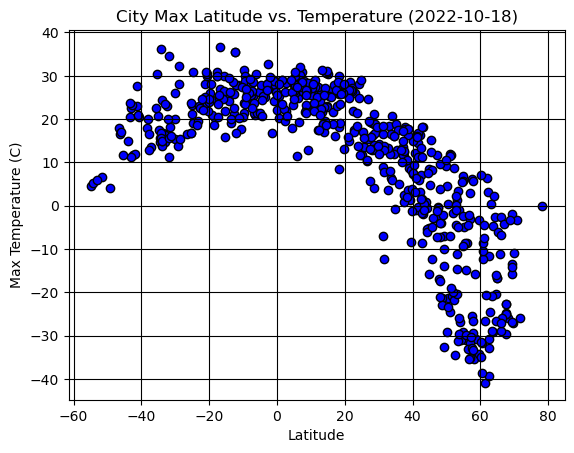

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',facecolors='blue',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(color='black')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

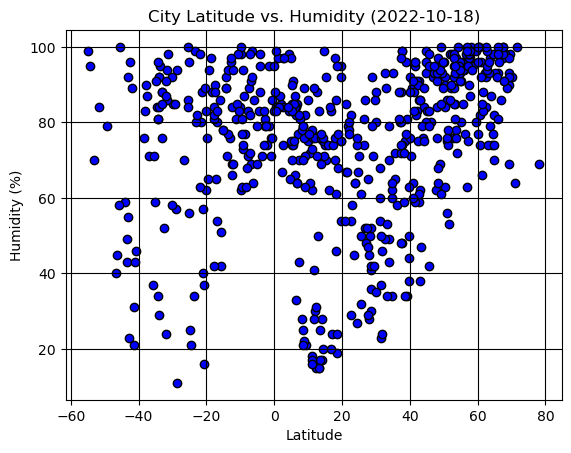

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',facecolors='blue',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='black')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

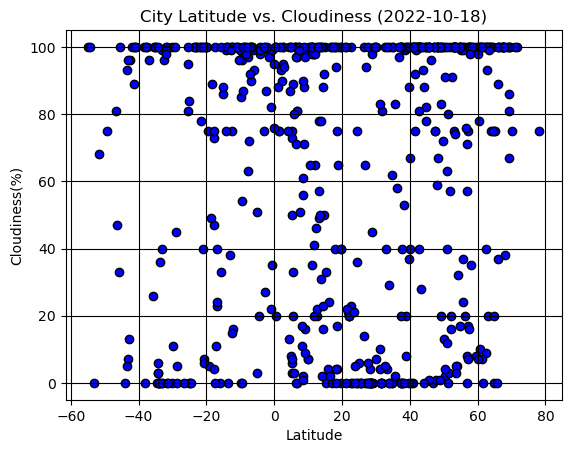

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',facecolors='blue',edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(color='black')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

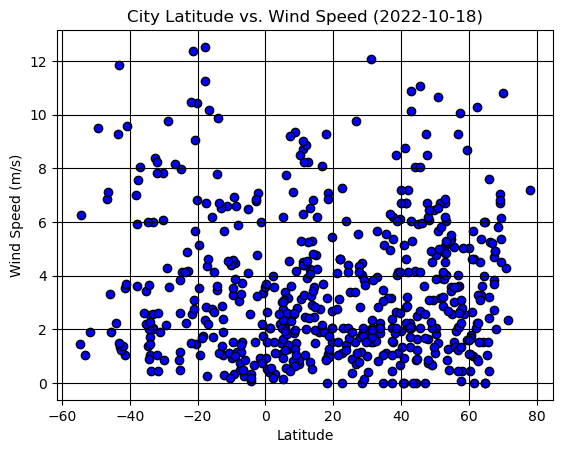

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',facecolors='blue',edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(color='black')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
w_slope, w_int, w_r, w_p, w_std_err = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qa'en,33.7265,59.1844,6.51,49,29,2.23,IR,1702260736
2,novogornyy,55.6300,60.7919,-30.94,96,37,3.01,RU,1702260737
3,krasnokamensk,50.0979,118.0369,-29.25,96,13,1.13,RU,1702260737
4,yellowknife,62.4560,-114.3525,-11.71,92,100,10.29,CA,1702260575
5,ilulissat,69.2167,-51.1000,-1.99,69,100,6.69,GL,1702260738


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.12,79,75,9.51,TF,1702260736
6,cidreira,-30.1811,-50.2056,20.04,92,100,7.83,BR,1702260739
9,liwale,-9.7667,37.9333,21.34,98,99,0.93,TZ,1702260741
14,pamanukan,-6.2842,107.8106,30.45,64,99,0.25,ID,1702260744
16,ushuaia,-54.8000,-68.3000,4.50,99,100,1.44,AR,1702260745


###  Temperature vs. Latitude Linear Regression Plot

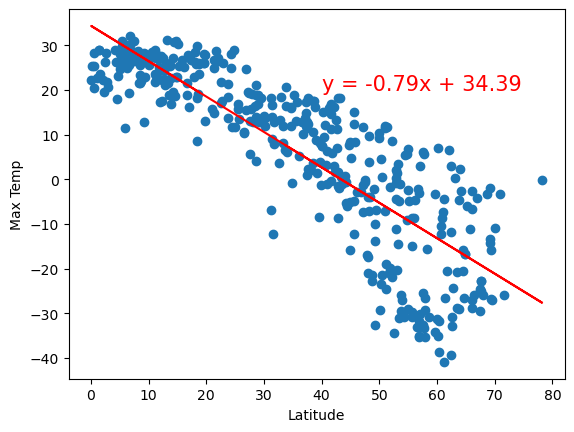

The r value is -0.8457098361831477


In [54]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
n_slope, n_int, n_r, n_p, n_std_err = linregress(north_lat, north_temp)
n_fit = n_slope * north_lat + n_int
line_eq = "y = " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))

plt.scatter(north_lat,north_temp)
plt.plot(north_lat,n_fit,"-",color='red')
plt.annotate(line_eq,(40,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r value is {n_r}')

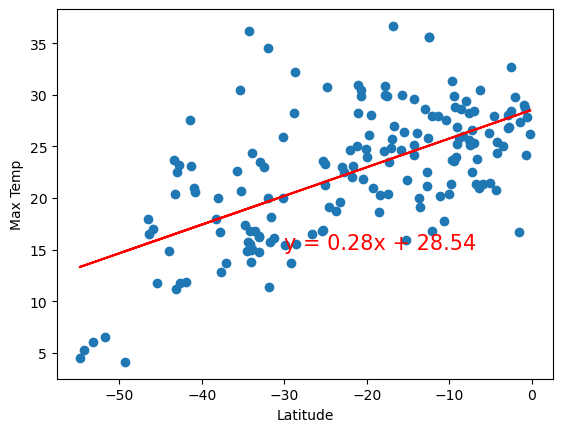

The r-value is 0.6099237455159618


In [56]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
s_slope, s_int, s_r, s_p, s_std_err = linregress(south_lat, south_temp)
s_fit = s_slope * south_lat + s_int
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_int,2))

plt.scatter(south_lat,south_temp)
plt.plot(south_lat,s_fit,"-",color='red')
plt.annotate(line_eq,(-30,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f'The r-value is {s_r}')

**Discussion about the linear relationship:** Based on the graph, since the R-value at .84 it indicates there is high correlation in the north hemisphere between an increase in latitude and a decrease in temperature. In the southern hemisphere, there is some correlation, but not as strong with an increase in latitude and an increase in max temperature.

### Humidity vs. Latitude Linear Regression Plot

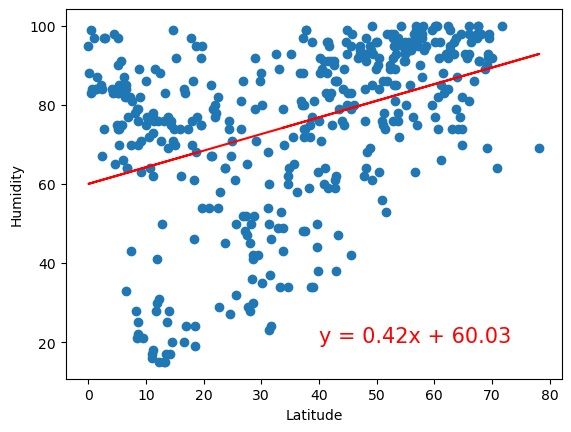

The r value is 0.3977325635327393


In [57]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_humidity = northern_hemi_df['Humidity']
n_slope, n_int, n_r, n_p, n_std_err = linregress(north_lat, north_humidity)
n_fit = n_slope * north_lat + n_int
line_eq = "y = " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))

plt.scatter(north_lat,north_humidity)
plt.plot(north_lat,n_fit,"-",color='red')
plt.annotate(line_eq,(40,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r value is {n_r}')

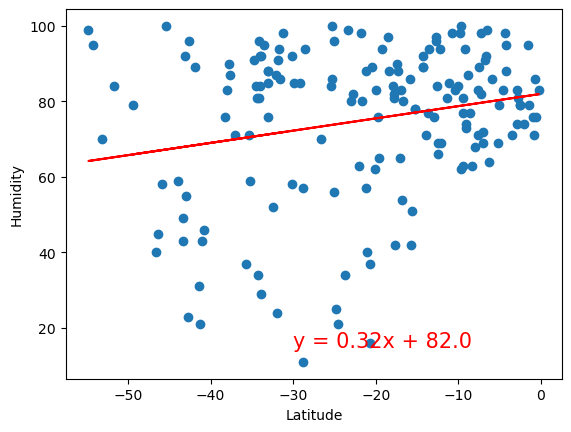

The r-value is 0.22235655465470325


In [58]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_humidity = southern_hemi_df['Humidity']
s_slope, s_int, s_r, s_p, s_std_err = linregress(south_lat, south_humidity)
s_fit = s_slope * south_lat + s_int
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_int,2))

plt.scatter(south_lat,south_humidity)
plt.plot(south_lat,s_fit,"-",color='red')
plt.annotate(line_eq,(-30,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The r-value is {s_r}')

**Discussion about the linear relationship:** With a low r value, there is low correlation in both hemispheres between latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

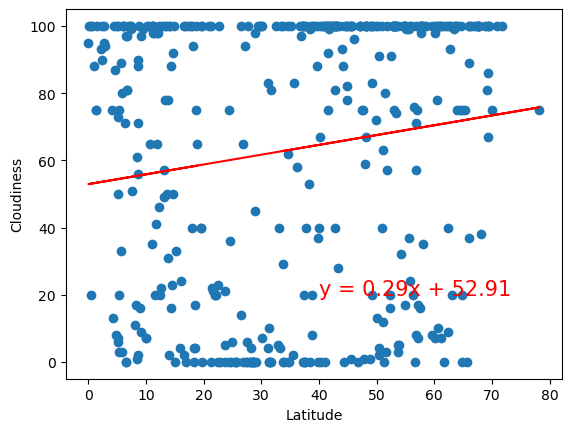

The r value is 0.1457064980401357


In [59]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_cloudiness = northern_hemi_df['Cloudiness']
n_slope, n_int, n_r, n_p, n_std_err = linregress(north_lat, north_cloudiness)
n_fit = n_slope * north_lat + n_int
line_eq = "y = " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))

plt.scatter(north_lat,north_cloudiness)
plt.plot(north_lat,n_fit,"-",color='red')
plt.annotate(line_eq,(40,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r value is {n_r}')

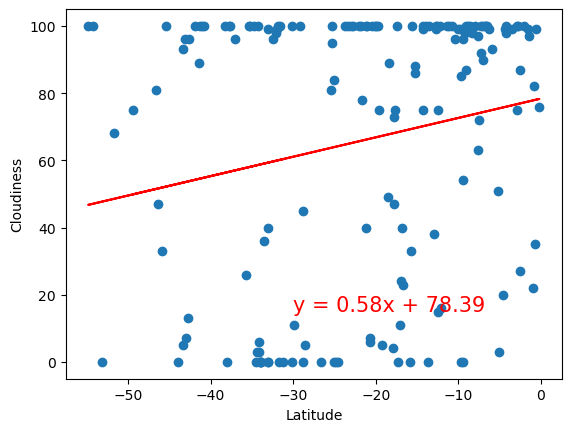

The r-value is 0.19766311986541238


In [60]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_cloudiness = southern_hemi_df['Cloudiness']
s_slope, s_int, s_r, s_p, s_std_err = linregress(south_lat, south_cloudiness)
s_fit = s_slope * south_lat + s_int
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_int,2))

plt.scatter(south_lat,south_cloudiness)
plt.plot(south_lat,s_fit,"-",color='red')
plt.annotate(line_eq,(-30,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The r-value is {s_r}')

**Discussion about the linear relationship:** There is very low correlation between Latitude and cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

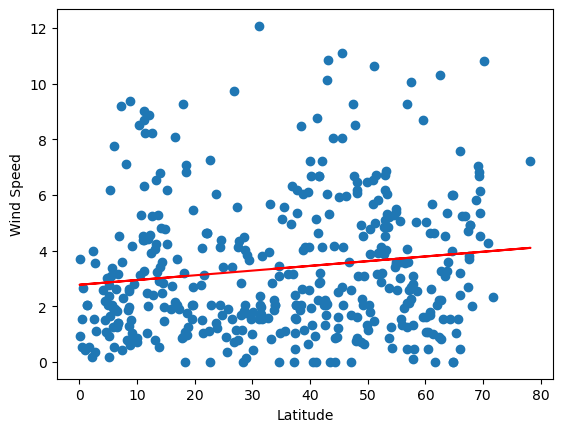

The r value is 0.1414630026800601


In [61]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed']
n_slope, n_int, n_r, n_p, n_std_err = linregress(north_lat, north_wind)
n_fit = n_slope * north_lat + n_int
line_eq = "y = " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))

plt.scatter(north_lat,north_wind)
plt.plot(north_lat,n_fit,"-",color='red')
plt.annotate(line_eq,(40,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r value is {n_r}')

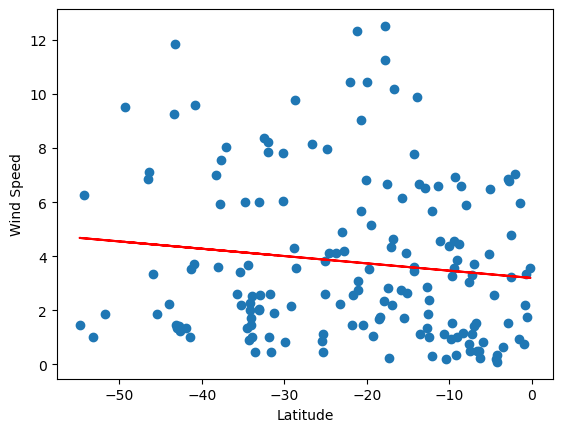

The r-value is -0.12707876691832865


In [62]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_wind = southern_hemi_df['Wind Speed']
s_slope, s_int, s_r, s_p, s_std_err = linregress(south_lat, south_wind)
s_fit = s_slope * south_lat + s_int
line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_int,2))

plt.scatter(south_lat,south_wind)
plt.plot(south_lat,s_fit,"-",color='red')
plt.annotate(line_eq,(-30,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The r-value is {s_r}')

**Discussion about the linear relationship:** There is very low correlation in both hemispheres between latitude and wind speed.